In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv1D,MaxPooling1D
from tensorflow.keras.layers import LSTM,Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import ModelCheckpoint
np.random.seed(7)
from prettytable import PrettyTable
import warnings
warnings.filterwarnings('ignore')

# ACTIVIDADES

## 1. Ejecute el procedimiento y compare el resultado de las variables accuracy_lstm y accuracy_cnn_lstm

In [2]:
# load the dataset but only keep the top n words, zero the rest
top_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
X_train,X_cv,y_train,y_cv = train_test_split(X_train,y_train,test_size = 0.2)
print("Shape of train data:", X_train.shape)
print("Shape of Test data:", X_test.shape)
print("Shape of CV data:", X_cv.shape)

# truncate and pad input sequences
max_review_length = 600
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)
X_cv = sequence.pad_sequences(X_cv,maxlen=max_review_length)

17473536/17464789 [==============================] - 1s 0us/step
Shape of train data: (20000,)
Shape of Test data: (25000,)
Shape of CV data: (5000,)


In [3]:
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
filepath="weights_best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max',save_weights_only=True)
callbacks_list = [checkpoint]
history_lstm = model.fit(X_train, y_train, epochs=5, batch_size=256,verbose = 1,callbacks = callbacks_list,validation_data=(X_cv,y_cv))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 600, 32)           320000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               53200     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 373,301
Trainable params: 373,301
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
79/79 [==============================] - 87s 1s/step - loss: 0.6323 - accuracy: 0.6202 - val_loss: 0.4641 - val_accuracy: 0.7994

Epoch 00001: val_accuracy improved from -inf to 0.79940, saving model to weights_best.hdf5
Epoch 2/5
79/79 [==============================] - 87s 1s/step - loss: 0.3684 - accuracy: 0.8402 - val_loss: 0.3649 - val_accuracy: 0.8506

Epoc

In [4]:
# Final evaluation of the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.load_weights("weights_best.hdf5")
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
scores = model.evaluate(X_test, y_test, verbose=1,batch_size = 256)
accuracy_lstm = scores[1]*100
print("Accuracy using LSTM: %.2f%%" % (accuracy_lstm))

98/98 [==============================] - 24s 247ms/step - loss: 0.3460 - accuracy: 0.8676
Accuracy using LSTM: 86.76%


### CNN + LSTM

In [5]:
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
filepath="weights_best_cnn.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max',save_weights_only=True)
callbacks_list = [checkpoint]
history_cnn_lstm = model.fit(X_train, y_train, epochs=5, batch_size=256,verbose = 1,callbacks = callbacks_list,validation_data=(X_cv,y_cv))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 600, 32)           320000    
_________________________________________________________________
conv1d (Conv1D)              (None, 600, 32)           3104      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 300, 32)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 376,405
Trainable params: 376,405
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
79/79 [==============================] - 40s 497ms/step - loss: 0.6500 - accuracy: 0.6420 - val_los

In [6]:
# La mejor manera de resolver una ecuación cuadrática
# Final evaluation of the model
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.load_weights("weights_best_cnn.hdf5")
scores = model.evaluate(X_test, y_test, verbose=0)
accuracy_cnn_lstm = scores[1]*100
print("Accuracy CNN using LSTM: %.2f%%" % (accuracy_cnn_lstm))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 600, 32)           320000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 600, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 300, 32)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 376,405
Trainable params: 376,405
Non-trainable params: 0
_________________________________________________________________
None
Accuracy CNN using LSTM: 87.09%


### Comparación

In [7]:
import gc 
from matplotlib import pyplot as plt 

In [8]:
table = PrettyTable()
table.field_names = ['Model', 'Accuracy']
table.add_row(['LSTM', accuracy_cnn_lstm])
table.add_row(['CNN using LSTM', accuracy_lstm])
print(table)

+----------------+-------------------+
|     Model      |      Accuracy     |
+----------------+-------------------+
|      LSTM      | 87.09200024604797 |
| CNN using LSTM | 86.76000237464905 |
+----------------+-------------------+


In [16]:
def show_train_history(train_history, train, validation, lab: str):
  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title(f'Train History: {lab}')
  plt.ylabel(train)
  plt.xlabel('Epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

##### Accuracy 

LSTM presenta un mayor precisión en el conjunto de TEST y de TRAIN, sin embargo el ajuste toma mucho más tiempo en comparación a CNN+LSTM. En cuanto a ACCURACY, LSTM se mantienen incrementándose, lo que indica una buena generalización y aprendizaje. Sin embargo, CNN+LSTM se mantiene constante hasta EPOCH=2, luego decae lo que podría indicar un sobreajuste. 

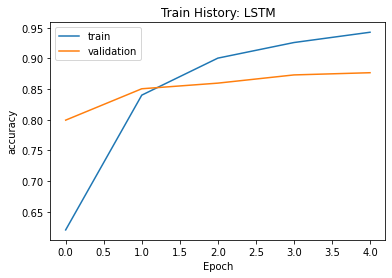

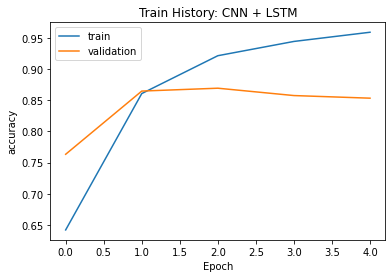

In [11]:
show_train_history(history_lstm,'accuracy','val_accuracy', 'LSTM')
show_train_history(history_cnn_lstm, 'accuracy','val_accuracy', 'CNN + LSTM')

#### Loss 

LOSS en LSTM continúa descendiendo, aunque distantes, el modelo estaría generalizando bien y no ajustanto. Sin embargo, en CNN+LSTM VAL empieza a incrementar, lo que indicaría overfitting.

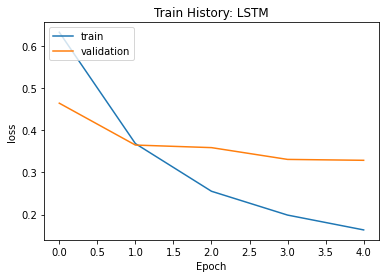

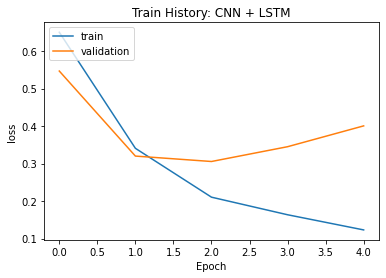

In [12]:
show_train_history(history_lstm,'loss','val_loss', 'LSTM')
show_train_history(history_cnn_lstm, 'loss','val_loss', 'CNN + LSTM')

## 2. Replique el procedimiento para el conjunto de datos enviado en anexo para crear un clasificador de sentimientos en espaniol (Big_AHR.csv.zip).

- Usaré las mismas VARIABLES para del ejemplo
- Salida cambiada de SIGMOID a SOFTMAX
- Clases desbalanceadas. Uso de: stratify

In [48]:
import pandas as pd 
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import re

In [46]:
df = pd.read_csv('./data/Big_AHR.csv', usecols=['review_text', 'label'], sep=',')
df.head()

,review_text,label
0,Un hotel muy bueno. El personal fue muy amabl...,1
1,"Muy buen hotel al nivel de lo esperado, habita...",1
2,Magnífico hotel. La verdad es que todo perfect...,1
3,"Hotel hermoso, buen diseño, original, limpio. ...",1
4,Magnífica ubicación en pleno centro de Sevilla...,1


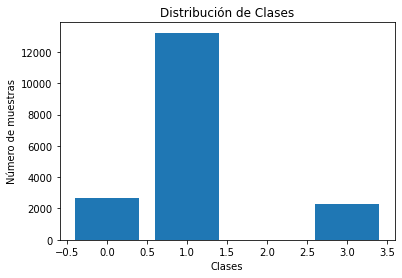

In [47]:
class_counts = df['label'].value_counts()

labels = class_counts.index
counts = class_counts.values

plt.bar(labels, counts)
plt.xlabel('Clases')
plt.ylabel('Número de muestras')
plt.title('Distribución de Clases')
plt.show()

In [49]:
df['review_text'] = df['review_text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [55]:
tokenizer = Tokenizer(num_words=top_words)
tokenizer.fit_on_texts(df['review_text'])
sequences = tokenizer.texts_to_sequences(df['review_text'])

In [57]:
X = sequence.pad_sequences(sequences, maxlen=max_review_length)

In [58]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['label'])

In [59]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y)
X_test, X_cv, y_test, y_cv = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp)

#### LSTM

In [60]:
y_train_encoded = to_categorical(y_train)
y_cv_encoded = to_categorical(y_cv)

embedding_vector_length = 32
model_lstm = Sequential()
model_lstm.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model_lstm.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model_lstm.add(Dense(3, activation='softmax'))

model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
filepath="weights_best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', save_weights_only=True)
callbacks_list = [checkpoint]

history_lstm_b = model_lstm.fit(X_train, y_train_encoded, epochs=5, batch_size=256, verbose=1, callbacks=callbacks_list, validation_data=(X_cv, y_cv_encoded))

Epoch 1/5
43/43 [==============================] - 49s 1s/step - loss: 0.8124 - accuracy: 0.7197 - val_loss: 0.6839 - val_accuracy: 0.7279

Epoch 00001: val_accuracy improved from -inf to 0.72792, saving model to weights_best.hdf5
Epoch 2/5
43/43 [==============================] - 47s 1s/step - loss: 0.5266 - accuracy: 0.7852 - val_loss: 0.4446 - val_accuracy: 0.8259

Epoch 00002: val_accuracy improved from 0.72792 to 0.82586, saving model to weights_best.hdf5
Epoch 3/5
43/43 [==============================] - 48s 1s/step - loss: 0.3708 - accuracy: 0.8441 - val_loss: 0.3907 - val_accuracy: 0.8404

Epoch 00003: val_accuracy improved from 0.82586 to 0.84044, saving model to weights_best.hdf5
Epoch 4/5
43/43 [==============================] - 48s 1s/step - loss: 0.3010 - accuracy: 0.8656 - val_loss: 0.3674 - val_accuracy: 0.8492

Epoch 00004: val_accuracy improved from 0.84044 to 0.84924, saving model to weights_best.hdf5
Epoch 5/5
43/43 [==============================] - 48s 1s/step - lo

In [61]:
model_lstm.load_weights("weights_best.hdf5")

model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

y_test_encoded = to_categorical(y_test)
scores = model_lstm.evaluate(X_test, y_test_encoded, verbose=1, batch_size=256)
accuracy_lstm = scores[1] * 100
print("Accuracy using LSTM: %.2f%%" % (accuracy_lstm))

15/15 [==============================] - 4s 224ms/step - loss: 0.3639 - accuracy: 0.8489
Accuracy using LSTM: 84.89%


##### CNN+LSTM

In [63]:
model_cnn_lstm_b = Sequential()
model_cnn_lstm_b.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model_cnn_lstm_b.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model_cnn_lstm_b.add(MaxPooling1D(pool_size=2))
model_cnn_lstm_b.add(LSTM(100))
model_cnn_lstm_b.add(Dense(3, activation='softmax')) 

model_cnn_lstm_b.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
filepath = "weights_best_cnn.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', save_weights_only=True)
callbacks_list = [checkpoint]
history_cnn_lstm_b = model_cnn_lstm_b.fit(X_train, y_train_encoded, epochs=5, batch_size=256, verbose=1, callbacks=callbacks_list, validation_data=(X_cv, y_cv_encoded))

Epoch 1/5
43/43 [==============================] - 24s 548ms/step - loss: 0.8187 - accuracy: 0.7171 - val_loss: 0.7172 - val_accuracy: 0.7279

Epoch 00001: val_accuracy improved from -inf to 0.72792, saving model to weights_best_cnn.hdf5
Epoch 2/5
43/43 [==============================] - 23s 548ms/step - loss: 0.5844 - accuracy: 0.7365 - val_loss: 0.4942 - val_accuracy: 0.8028

Epoch 00002: val_accuracy improved from 0.72792 to 0.80275, saving model to weights_best_cnn.hdf5
Epoch 3/5
43/43 [==============================] - 22s 514ms/step - loss: 0.4170 - accuracy: 0.8286 - val_loss: 0.4160 - val_accuracy: 0.8344

Epoch 00003: val_accuracy improved from 0.80275 to 0.83439, saving model to weights_best_cnn.hdf5
Epoch 4/5
43/43 [==============================] - 23s 525ms/step - loss: 0.3042 - accuracy: 0.8739 - val_loss: 0.3754 - val_accuracy: 0.8520

Epoch 00004: val_accuracy improved from 0.83439 to 0.85199, saving model to weights_best_cnn.hdf5
Epoch 5/5
43/43 [======================

In [64]:
model_cnn_lstm_b.load_weights('weights_best_cnn.hdf5')
model_cnn_lstm_b.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

scores = model_cnn_lstm_b.evaluate(X_test, y_test_encoded, verbose=1, batch_size=256)
accuracy_cnn_lstm = scores[1] * 100
print("Accuracy using LSTM: %.2f%%" % (accuracy_cnn_lstm))

15/15 [==============================] - 3s 155ms/step - loss: 0.3763 - accuracy: 0.8553
Accuracy using LSTM: 85.53%


### Comparación

En cuanto a precisión, CNN+LSTM supera a LSTM

In [65]:
table = PrettyTable()
table.field_names = ['Model', 'Accuracy']
table.add_row(['LSTM', accuracy_lstm])
table.add_row(['CNN using LSTM', accuracy_cnn_lstm])
print(table)

+----------------+-------------------+
|     Model      |      Accuracy     |
+----------------+-------------------+
|      LSTM      | 84.89267826080322 |
| CNN using LSTM | 85.52559018135071 |
+----------------+-------------------+


#### Accuracy

LSTM se comporta muy bien hasta EPOCH=3, luego la precisón de validación cae, lo que podría indicar overfitting. De la misma forma, CNN+LSTM actuan bien y luego decienden. Esto puede deberse a la disparejidad de clases.

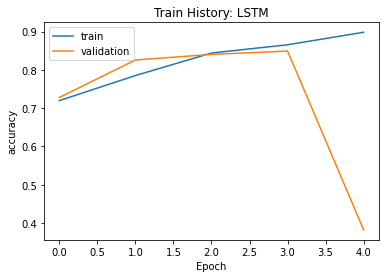

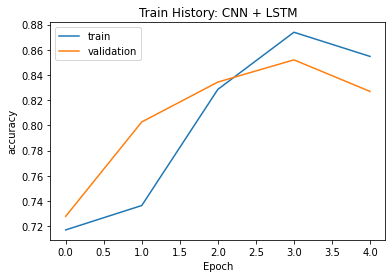

In [66]:
show_train_history(history_lstm_b,'accuracy','val_accuracy', 'LSTM')
show_train_history(history_cnn_lstm_b, 'accuracy','val_accuracy', 'CNN + LSTM')

#### Loss 

LSTM presenta un claro OVERFITTING , al igual que CNN+LSTM

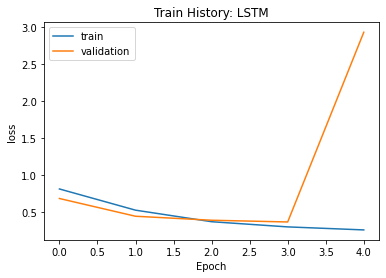

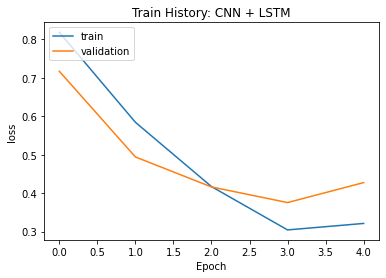

In [67]:
show_train_history(history_lstm_b,'loss','val_loss', 'LSTM')
show_train_history(history_cnn_lstm_b, 'loss','val_loss', 'CNN + LSTM')